In [73]:
import pandas as pd
import pyreadstat
import scipy.stats as sp
#pyreadstat is not an optional dependency despite the importerror messages saying so. I tried installing it with conda but it
#said that the package was unavailable. I installed it using pip and had success. I'm not sure if using the two different 
#package managers will cause problems.

In [74]:
CCGA2012df = pd.read_spss('SPSSdataFiles/2012public.sav')
CCGA2014df = pd.read_spss('SPSSdataFiles/2014public.sav')
CCGA2016df = pd.read_spss('SPSSdataFiles/2016ChicagoCouncilSurvey-DataSet.sav')
CCGA2017df = pd.read_spss('SPSSdataFiles/2017public.sav')
CCGA2019df = pd.read_spss('SPSSdataFiles/2019 Chicago Council Survey - Datafile.sav')
CCGA2020df = pd.read_spss('SPSSdataFiles/20-039675-01_Chicago Council_2020 Annual Survey_Main_Client.sav')

In [75]:
# Here I using a list of possible column names from the codebooks for each dataset and testing 
# to see if they are present in each year of CCGA data.
# 2014 was the least consistent in column names.

iterable_list_of_dfs = [CCGA2012df, CCGA2014df, CCGA2016df, CCGA2017df, CCGA2019df, CCGA2020df]
test_column_names = ['CaseID', 'ppagect4', 'Q1010', 'partyid3nl', 'PPGENDER', 'PPETHM', 'weight', 'Weight', 'weight1']
empty_ls = []

for col_name in test_column_names:
    for df in iterable_list_of_dfs:
        empty_ls.append(tuple((col_name, col_name in list(df))))
       
empty_ls

[('CaseID', True),
 ('CaseID', False),
 ('CaseID', True),
 ('CaseID', True),
 ('CaseID', True),
 ('CaseID', True),
 ('ppagect4', True),
 ('ppagect4', False),
 ('ppagect4', True),
 ('ppagect4', True),
 ('ppagect4', True),
 ('ppagect4', True),
 ('Q1010', True),
 ('Q1010', False),
 ('Q1010', True),
 ('Q1010', True),
 ('Q1010', True),
 ('Q1010', True),
 ('partyid3nl', False),
 ('partyid3nl', False),
 ('partyid3nl', False),
 ('partyid3nl', True),
 ('partyid3nl', False),
 ('partyid3nl', False),
 ('PPGENDER', True),
 ('PPGENDER', False),
 ('PPGENDER', True),
 ('PPGENDER', True),
 ('PPGENDER', True),
 ('PPGENDER', True),
 ('PPETHM', True),
 ('PPETHM', False),
 ('PPETHM', True),
 ('PPETHM', True),
 ('PPETHM', True),
 ('PPETHM', True),
 ('weight', False),
 ('weight', False),
 ('weight', False),
 ('weight', False),
 ('weight', True),
 ('weight', True),
 ('Weight', False),
 ('Weight', False),
 ('Weight', True),
 ('Weight', False),
 ('Weight', False),
 ('Weight', False),
 ('weight1', True),
 ('weig

## Here I am standardizing the column names for each year of survey data and then merging the frames with a keyed hierarchical index that corresponds to the year that each survey was taken. 

In [76]:
clean_2012df = CCGA2012df[['CaseID', 'Q21', 'Q1010', "weight1", "PPGENDER", "PPETHM", "ppagect4"]]
clean_2012df.rename(columns = {
    'weight1':'Weight'
}, inplace=True)

C:\Users\wesle\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [77]:
clean_2014df = CCGA2014df[["Respondent_Serial", "q21", "q1010", "weight1", "ppgender", "ppethm", "ppage"]]
clean_2014df.rename(columns = {
    'Respondent_Serial':'CaseID', 'q21':'Q21', 'q1010':'Q1010', 'weight1':'Weight', 'ppgender':'PPGENDER', 'ppethm':'PPETHM', 'ppage':'ppagect4'
}, inplace=True)

In [78]:
clean_2016df = CCGA2016df[['CaseID', 'Q21', 'Q1010', "Weight", "PPGENDER", "PPETHM", "ppagect4"]]

In [79]:
clean_2017df = CCGA2017df[['CaseID', 'Q21', 'Q1010', "Weight1", "PPGENDER", "PPETHM", "ppagect4"]]
clean_2017df.rename(columns = {
    'Weight1':'Weight'
}, inplace=True)

In [80]:
clean_2019df = CCGA2019df[['CaseID', 'Q21', 'Q1010', "weight", "PPGENDER", "PPETHM", "ppagect4"]]
clean_2019df.rename(columns = {
    'weight':'Weight'
}, inplace=True)

In [81]:
clean_2020df = CCGA2020df[['CaseID', 'Q21', 'Q1010', "weight", "PPGENDER", "PPETHM", "ppagect4"]]
clean_2020df.rename(columns = {
    'weight':'Weight'
}, inplace=True)

In [82]:
# Here I am iterating over the DF and checking to make sure that 
# the merge worked and that the resulting DF is the shape that I want.

frames = [clean_2012df, clean_2014df, clean_2016df, clean_2017df, clean_2019df, clean_2020df]
keys=[2012, 2014, 2016, 2017, 2019, 2020]
all_years_df = pd.concat(frames, keys=[2012, 2014, 2016, 2017, 2019, 2020])

for year in keys:
    print(all_years_df.loc[year][['Q21', 'Q1010']])
    

                                    Q21        Q1010
0         No greater than other nations  Independent
1         No greater than other nations     Democrat
2     The greatest country in the world  Independent
3     The greatest country in the world   Republican
4     The greatest country in the world   Republican
...                                 ...          ...
1872  The greatest country in the world   Republican
1873  The greatest country in the world   Republican
1874      No greater than other nations     Democrat
1875  The greatest country in the world     Democrat
1876  The greatest country in the world     Democrat

[1877 rows x 2 columns]
                                    Q21        Q1010
0     The greatest country in the world  Independent
1         No greater than other nations  Independent
2     The greatest country in the world   Republican
3     The greatest country in the world  Independent
4     The greatest country in the world     Democrat
...                  

In [83]:
# Here I am initializing some masks that select only the Q21 variable.

exceptionalism_2012_mask=CCGA2012df['Q21'] == "The greatest country in the world"
exceptionalism_2014_mask=CCGA2014df['q21'] == "The greatest country in the world"
exceptionalism_2016_mask=CCGA2016df['Q21'] == "The greatest country in the world"
exceptionalism_2017_mask=CCGA2017df['Q21'] == "The greatest country in the world"
exceptionalism_2019_mask=CCGA2019df['Q21'] == "The greatest country in the world"
exceptionalism_2020_mask=CCGA2020df['Q21'] == "The greatest country in the world"

In [84]:
# Here I am calculating the percentage of responses for each year that answered "The greatest country in the world" on Q21 

sample_means_ls = [
    ((len(CCGA2012df[exceptionalism_2012_mask])/len(CCGA2012df))*100),
    ((len(CCGA2014df[exceptionalism_2014_mask])/len(CCGA2014df))*100),
    ((len(CCGA2016df[exceptionalism_2016_mask])/len(CCGA2016df))*100),
    ((len(CCGA2017df[exceptionalism_2017_mask])/len(CCGA2017df))*100),
    ((len(CCGA2019df[exceptionalism_2019_mask])/len(CCGA2019df))*100),
    ((len(CCGA2020df[exceptionalism_2020_mask])/len(CCGA2020df))*100)
]

print(sample_means_ls)

[70.378263185935, 66.46110056925995, 62.73653566229985, 63.44202898550725, 58.76639145216125, 57.555660824253906]


In [85]:
# To get the weighted mean I use a booleanmask to select the values that responded with "The greatest country in the world"
# and put the sum of the weights of those responses over the total of the weights. Effectively treating the response of
# "The greatest country in the world" as equal to 1.

# weighted_mean_formula = (df[weight]*df[response as a number]).sum()/df[weight].sum()

# The way that the weights are calculated can differ from year to year. 2017 had like 8 different weight variables.

weighted_means_ls= [
    CCGA2012df[exceptionalism_2012_mask]['weight1'].sum()/CCGA2012df['weight1'].sum(),
    CCGA2014df[exceptionalism_2014_mask]['weight1'].sum()/CCGA2014df['weight1'].sum(),
    CCGA2016df[exceptionalism_2016_mask]['Weight'].sum()/CCGA2016df['Weight'].sum(),
    CCGA2017df[exceptionalism_2017_mask]['Weight1'].sum()/CCGA2017df['Weight1'].sum(),
    CCGA2019df[exceptionalism_2019_mask]['weight'].sum()/CCGA2019df['weight'].sum(),
    CCGA2020df[exceptionalism_2020_mask]['weight'].sum()/CCGA2020df['weight'].sum()
]

weighted_means_ls

[0.7006456420162835,
 0.6469217071957698,
 0.610721606726692,
 0.6291128640809741,
 0.5670888505542082,
 0.5427296651286607]

In [86]:
# Here I am slecting all responses that answered "The greatest country in the world" to Q21
# and calculating what percent of data identifies as Republicn, Democrt, and Independent, and then 
# placing those values in a list that will be easy to plot.

republican_yes_Q21_ls = [
    len(CCGA2012df[(CCGA2012df['Q21'] == 'The greatest country in the world') & (CCGA2012df['Q1010'] == 'Republican')])/len(CCGA2012df),
    len(CCGA2014df[(CCGA2014df['q21'] == 'The greatest country in the world') & (CCGA2014df['q1010'] == 'Republican')])/len(CCGA2014df),
    len(CCGA2016df[(CCGA2016df['Q21'] == 'The greatest country in the world') & (CCGA2016df['Q1010'] == 'Republican')])/len(CCGA2016df),
    len(CCGA2017df[(CCGA2017df['Q21'] == 'The greatest country in the world') & (CCGA2017df['Q1010'] == 'Republican')])/len(CCGA2017df),
    len(CCGA2019df[(CCGA2019df['Q21'] == 'The greatest country in the world') & (CCGA2019df['Q1010'] == 'Republican')])/len(CCGA2019df),
    len(CCGA2020df[(CCGA2020df['Q21'] == 'The greatest country in the world') & (CCGA2020df['Q1010'] == 'Republican')])/len(CCGA2020df),
]

democrat_yes_Q21_ls = [
    len(CCGA2012df[(CCGA2012df['Q21'] == 'The greatest country in the world') & (CCGA2012df['Q1010'] == 'Democrat')])/len(CCGA2012df),
    len(CCGA2014df[(CCGA2014df['q21'] == 'The greatest country in the world') & (CCGA2014df['q1010'] == 'Democrat')])/len(CCGA2014df),
    len(CCGA2016df[(CCGA2016df['Q21'] == 'The greatest country in the world') & (CCGA2016df['Q1010'] == 'Democrat')])/len(CCGA2016df),
    len(CCGA2017df[(CCGA2017df['Q21'] == 'The greatest country in the world') & (CCGA2017df['Q1010'] == 'Democrat')])/len(CCGA2017df),
    len(CCGA2019df[(CCGA2019df['Q21'] == 'The greatest country in the world') & (CCGA2019df['Q1010'] == 'Democrat')])/len(CCGA2019df),
    len(CCGA2020df[(CCGA2020df['Q21'] == 'The greatest country in the world') & (CCGA2020df['Q1010'] == 'Democrat')])/len(CCGA2020df),
]

independent_yes_Q21_ls = [
    len(CCGA2012df[(CCGA2012df['Q21'] == 'The greatest country in the world') & (CCGA2012df['Q1010'] == 'Independent')])/len(CCGA2012df),
    len(CCGA2014df[(CCGA2014df['q21'] == 'The greatest country in the world') & (CCGA2014df['q1010'] == 'Independent')])/len(CCGA2014df),
    len(CCGA2016df[(CCGA2016df['Q21'] == 'The greatest country in the world') & (CCGA2016df['Q1010'] == 'Independent')])/len(CCGA2016df),
    len(CCGA2017df[(CCGA2017df['Q21'] == 'The greatest country in the world') & (CCGA2017df['Q1010'] == 'Independent')])/len(CCGA2017df),
    len(CCGA2019df[(CCGA2019df['Q21'] == 'The greatest country in the world') & (CCGA2019df['Q1010'] == 'Independent')])/len(CCGA2019df),
    len(CCGA2020df[(CCGA2020df['Q21'] == 'The greatest country in the world') & (CCGA2020df['Q1010'] == 'Independent')])/len(CCGA2020df),
]

print(republican_yes_Q21_ls)
print(democrat_yes_Q21_ls)
print(independent_yes_Q21_ls)

[0.2509323388385722, 0.21726755218216318, 0.2430858806404658, 0.23478260869565218, 0.23506556580864496, 0.2567503552818569]
[0.23175279701651572, 0.22343453510436434, 0.18922852983988356, 0.1822463768115942, 0.16415735794074793, 0.1250592136428233]
[0.17581246670218434, 0.18311195445920303, 0.15623483745754488, 0.16847826086956522, 0.14715881495871783, 0.1605873993368072]


In [87]:
%matplotlib notebook

In [88]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [89]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


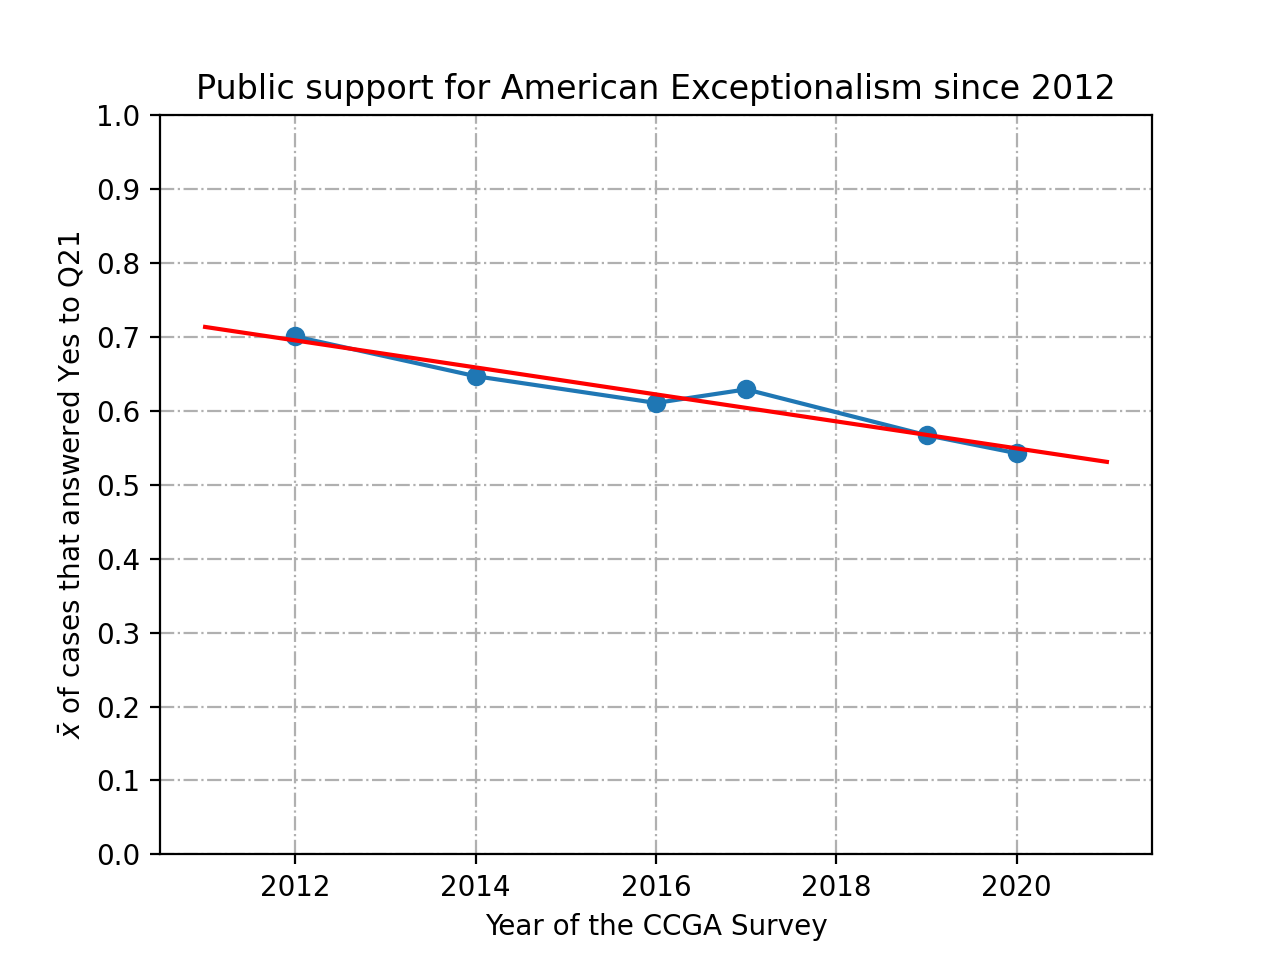

r =  -0.9692033716593726 
 p =  0.0014080442169373314 
 s =  0.002319105528860694


In [90]:
years_ls = [2012, 2014, 2016, 2017, 2019, 2020]
plt.figure()
plt.plot(years_ls, weighted_means_ls, '-o')
plt.ylim([0,1])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Year of the CCGA Survey')
plt.ylabel(r'$\bar{x}$ of cases that answered ''Yes'' to Q21')
plt.title('Public support for American Exceptionalism since 2012')
plt.grid(linestyle='-.')
y = weighted_means_ls
x = years_ls
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

x_0=2011
y_0=(x_0*slope)+intercept
x_1=2021
y_1=(x_1*slope)+intercept

plt.plot([x_0, x_1], [y_0, y_1], c='r')

plt.show()

## In the above figure, I have plotted the percentage of 'yes' responses on a scatter plot with the X variable being the year of the CCGA survey. I then performed a linear regression on these points to get a predictive model for 'American Exceptionalism' time. The model gave us an r value = -0.969, p value = 0.001, and an s value = 0.002. The model has a low p value which indicates a low probability that this data is the result of random chance and thus can be treated as statistically significant. The r value indicates that variation in Y, (the percent of responses that answered 'Yes',) is greatly explained by X, (the year of the CCGA survey.) Because of this, we can conclude that the model fits the data well.

<IPython.core.display.Javascript object>


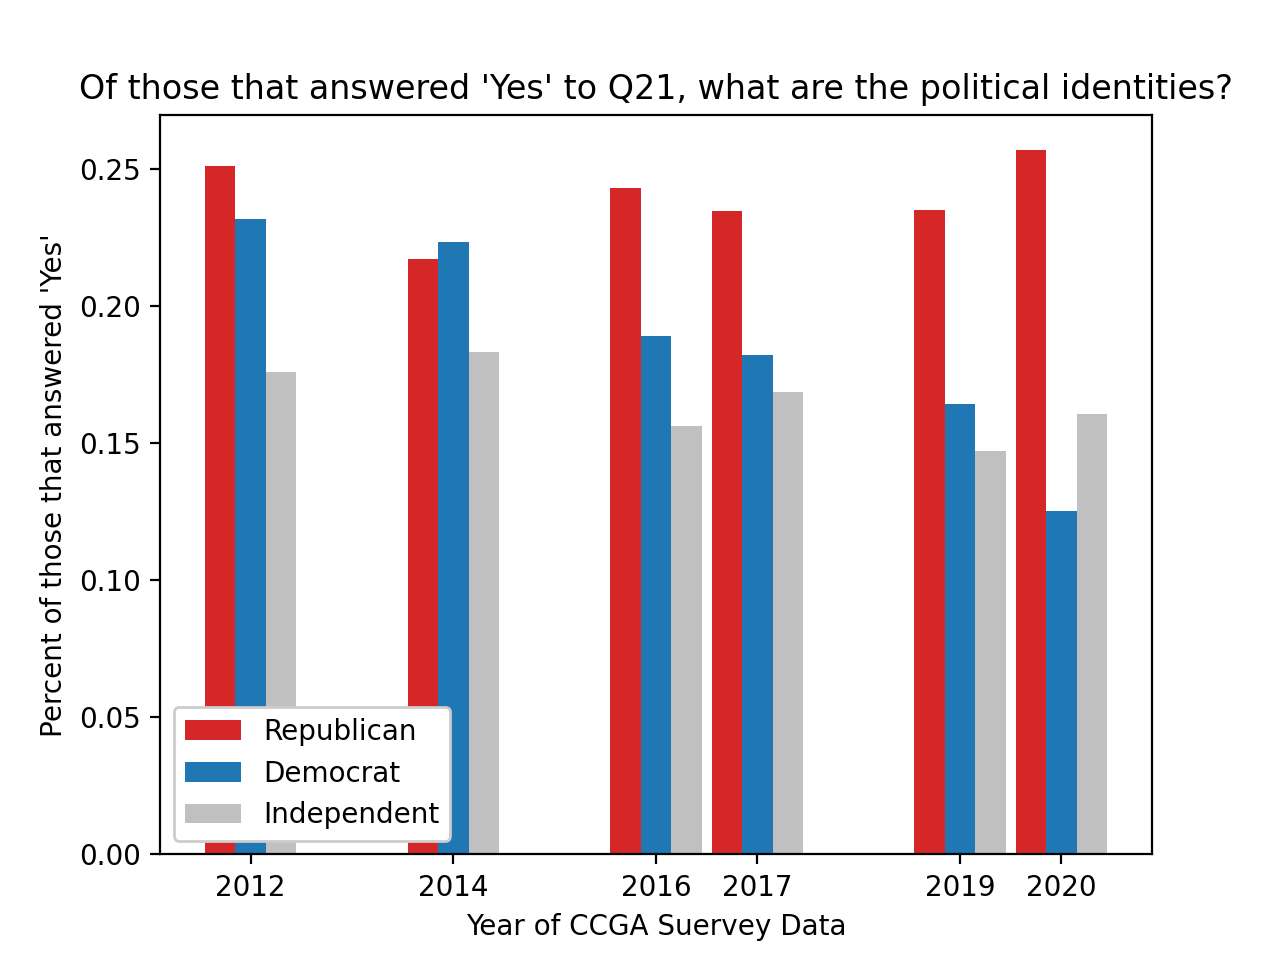

In [91]:
width =0.3
plt.figure()
plt.bar([2011.7, 2013.7, 2015.7, 2016.7, 2018.7, 2019.7], republican_yes_Q21_ls, color='tab:red', width=width)
plt.bar(years_ls, democrat_yes_Q21_ls, color='tab:blue', width=width)
plt.bar([2012.3, 2014.3, 2016.3, 2017.3, 2019.3, 2020.3], independent_yes_Q21_ls, color='silver', width=width)
plt.xticks(ticks=years_ls)
plt.legend(['Republican', 'Democrat', 'Independent'], loc="lower left", framealpha=1)
plt.ylabel('Percent of those that answered \'Yes\'')
plt.xlabel('Year of CCGA Suervey Data')
plt.title('Of those that answered \'Yes\' to Q21, what are the political identities?')
plt.show()

## Not displayed in the above figure are the values for "Refused" and "Other" as responses to Q1010. 

## In the above figure, I have isolated only 'Yes' responses to Q21 and calculated what percentage of those cases are Republican, Democrat, and Independent. From the figure, we can see that Democrats consistently make up a smaller proportion of 'Yes' answeres to Q21 year over year.

In [92]:
crosstab = pd.crosstab(all_years_df['Q1010'], all_years_df["Q21"])
crosstab

Q21,No greater than other nations,Refused,The greatest country in the world
Q1010,,,
Democrat,2031,37,2401
Independent,1467,29,2145
Other,435,17,423
Refused,70,15,118
Republican,664,20,3104


In [93]:
sp.chi2_contingency(crosstab)

(962.0087423720715,
 2.3629967165003227e-202,
 8,
 array([[1.60733839e+03, 4.06397965e+01, 2.82102181e+03],
        [1.30953661e+03, 3.31102035e+01, 2.29835319e+03],
        [3.14705996e+02, 7.95699753e+00, 5.52337007e+02],
        [7.30117910e+01, 1.84602343e+00, 1.28142186e+02],
        [1.36240721e+03, 3.44469790e+01, 2.39114581e+03]]))

## In the cells above, I created a crosstab of party identity and responses to Q21 for all years of CCGA data and performed a chi2 test of independence.

## H0: (null hypothesis) Q21 (support for American Exceptionalism) and Q1010 (party identity) are independent.
## H1: (alternative hypothesis) Q21 and Q1010 are not independent.
## alpha level = 0.05

## The test resulted in a p value =  2.3629967165003227e-202 which is incredibly small and allows us to reject the null hypothesis and conclude that Q21 and Q1010 are not independent. 